# Practice Logistic Regression on the Titanic dataset
Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

In [1]:
import numpy as np


Numpy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

In [2]:
import pandas as pd


Pandas is a Python library that provides data structures and data analysis tools for the Python programming language. Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD license.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Sklearn is a machine learning library for Python. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

In [4]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/titanic.csv'

In [5]:
data = pd.read_csv(url)

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# Let's subset the data down to only the variables we want to use in our model
subset = data[['Pclass', 'Age', 'SibSp', 'Fare','Survived']]

In [23]:
subset.head()

,Pclass,Age,SibSp,Fare,Survived
1,1,38.0,1,71.2833,1
3,1,35.0,1,53.1000,1
6,1,54.0,0,51.8625,0
10,3,4.0,1,16.7000,1
11,1,58.0,0,26.5500,1


What does 1 and 0 mean in the Survived column? 1 means the passenger survived.

In [26]:
# Let's inspect the data to see if there are any missing values
subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    183 non-null    int64  
 1   Age       183 non-null    float64
 2   SibSp     183 non-null    int64  
 3   Fare      183 non-null    float64
 4   Survived  183 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 8.6 KB


In [28]:
# If there were any null values, we would see as a different number of non-null values for each column
# There are no null values in this dataset, so we can proceed

In [29]:
# Select passenger information as the features and survival as the target
features = subset[['Pclass', 'Age', 'SibSp', 'Fare']]
target = subset['Survived']

In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test_1 = train_test_split(features, target, test_size=0.2)

# Create a logistic regression classifier
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_1 = model.predict(X_test)

In [80]:
# Let's evaluate the model's performance
from sklearn.metrics import accuracy_score

accuracy_score(y_test_1, y_pred_1)

0.7027027027027027

In [ ]:
# Note that with a test_size of 0.2, we get a different accuracy score each time we run the code
# This is because the train_test_split function randomly splits the data into training and testing sets

<Axes: >

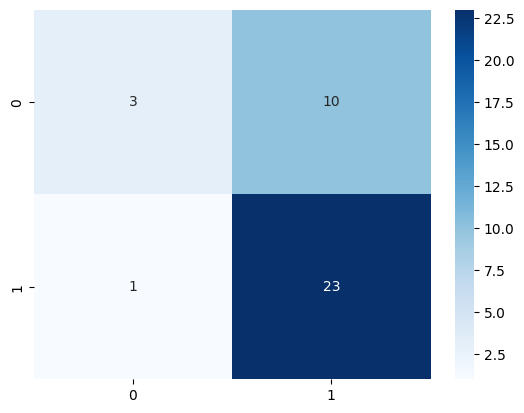

In [81]:
# How can I visualize this model?
# Let's use a confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_1, y_pred_1)

# Let's visualize the confusion matrix
import matplotlib.pyplot as plt

import seaborn as sns

# Plot the confusion matrix
ax1 = sns.heatmap(confusion_matrix(y_test_1, y_pred_1), annot=True, cmap='Blues')
ax1


A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.


We can use the confusion matrix to calculate the precision and recall of our model
Precision = TP / (TP + FP)

Precision is the proportion of positive identifications that were actually correct
In other words, it is the proportion of correctly predicted survivors out of all predicted survivors
In this case, it is the proportion of correctly predicted survivors out of all predicted survivors and non-survivors

In [82]:

# Print the precision of our model adding a '%' sign
print(f'Precision: {round(136 / (136 + 22),2)}%')

Precision: 0.86%


In [83]:
# This accuracy score is not bad, but we can do better.
# Let's try to improve the model by adding more features.

In [84]:
# First let's make a copy of the original data
data2 = data.copy()

In [85]:
# Now let's convert sex in data2 from a categorical variable to a numerical variable
data2['Sex_encoded'] = data2['Sex'].map({'male': 0, 'female': 1})

In [86]:
data2['Sex_encoded'].head(5)

1     1
3     1
6     0
10    1
11    1
Name: Sex_encoded, dtype: int64

In [87]:
# Let's add Sex_encoded to our features
expanded_features = data2[['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_encoded']]
target = data2['Survived']

In [88]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test_2 = train_test_split(expanded_features, target, test_size=0.2)

# Create a logistic regression classifier
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_2 = model.predict(X_test)

In [89]:
# Let's evaluate the model's performance
accuracy_score(y_test_2, y_pred_2)

0.7297297297297297

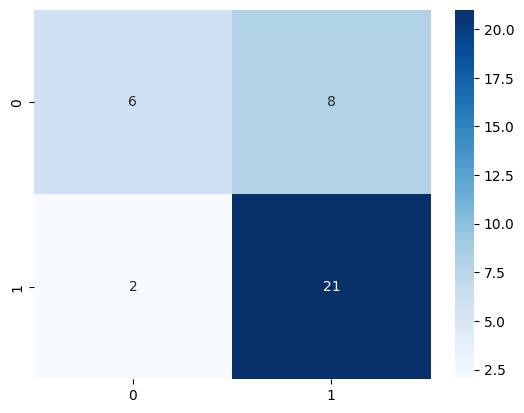

In [90]:
# Let's visualize the confusion matrix
confusion_matrix(y_test_2, y_pred_2)

ax2 = sns.heatmap(confusion_matrix(y_test_2, y_pred_2), annot=True, cmap='Blues')